In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle

import sys
import os

project_path = os.path.expanduser('~/repos/metric_graph/')
sys.path.append(project_path)

from construct_graph.graph import Graph, Flat
import construct_graph
from calculations.helper_functions import check_convergence, sequential_Newton, style_plot
import solve_laplace_operator

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
file = open("../data/rgg/coefficients/coefficients.pkl", "rb")
coefficients = pickle.load(file)
file.close()

In [164]:
coefficients_nums_Vs = np.sort(list(coefficients.keys()))[:-2]
print(coefficients_nums_Vs)
coefficients_means = []
for num_Vs in coefficients:
    coefficients_means.append(np.mean(coefficients[num_Vs]))
coefficients_means = np.array(coefficients_means)[:-2]
print(coefficients_means)

[  1000   1584   2511   3981   6309  10000  15848  25118  39810  63095
 100000 158489 251188]
[0.6899835  0.67921614 0.68530251 0.68732348 0.68699842 0.68497168
 0.68379039 0.68155196 0.68121621 0.68038494 0.67810716 0.6784782
 0.67867261]


In [ ]:
nums_Vs = np.concatenate(((10**np.linspace(3, 6, 16)).astype(int)[:14], np.array([1_000_000])))

array([100000, 158489, 251188, 398107])

In [135]:
nums_Vs = np.concatenate(((10**np.linspace(3, 6, 16)).astype(int)[:14], np.array([1_000_000])))
print(f"num_Vs = {nums_Vs}")

next_data = {}

for en, num_Vs in enumerate(nums_Vs[10:-1]):

    next_data[num_Vs] = {}

    en += 10

    print(f"\n\ngraph size = {en + 1} / {len(nums_Vs)}\n\n\n")

    seed = 0

    for seed in range(4):

        np.random.seed(seed)
        rd = construct_graph.patch_graph.RGG(num_Vs)
        g = construct_graph.patch_graph.Patch(rd)
        print(f"\nSEED = {seed}, num_Vs = {g.num_Vs}\n")
        eq = construct_graph.patch_graph.Cell_Problem(g)
        xi = eq.solve_corrector_equation()

        next_data[num_Vs][seed] = eq.construct_homogenized_tensor(xi)

num_Vs = [   1000    1584    2511    3981    6309   10000   15848   25118   39810
   63095  100000  158489  251188  398107 1000000]


graph size = 11 / 15




SEED = 0, num_Vs = 100000

Residual too large = 2.1423378734504864e-09

SEED = 1, num_Vs = 100000

Residual too large = 1.8499222861165246e-09

SEED = 2, num_Vs = 100000

Residual too large = 2.204670434489077e-09

SEED = 3, num_Vs = 100000

Residual too large = 2.2514567193696994e-09


graph size = 12 / 15




SEED = 0, num_Vs = 158489

Residual too large = 3.926381637492227e-09

SEED = 1, num_Vs = 158489

Residual too large = 3.3235347043738546e-09

SEED = 2, num_Vs = 158489

Residual too large = 3.6562551216638764e-09

SEED = 3, num_Vs = 158489

Residual too large = 4.5269281975661534e-09


graph size = 13 / 15




SEED = 0, num_Vs = 251188

Residual too large = 7.168294256029125e-09

SEED = 1, num_Vs = 251188

Residual too large = 6.10406482835779e-09

SEED = 2, num_Vs = 251188

Residual too large = 6.986430698999411e-09

SEE

In [148]:
next_data

{100000: {0: 0.6770243936200675,
  1: 0.6772763165543418,
  2: 0.6812815555353819,
  3: 0.678330544845908},
 158489: {0: 0.6768387734797449,
  1: 0.6771275264845933,
  2: 0.6825600822837298,
  3: 0.6781640490689809},
 251188: {0: 0.6753642439265388,
  1: 0.679165423653812,
  2: 0.6786683665739177,
  3: 0.678729826862338},
 398107: {0: 0.677783588138277,
  1: 0.6769242607225061,
  2: 0.6795186325142644,
  3: 0.6811648182985183}}

In [150]:
coefficients.keys()

dict_keys([1000, 1584, 2511, 3981, 6309, 10000, 15848, 25118, 39810, 63095, 1000000, 100000, 158489, 251188, 398107])

In [158]:
coefficients[398107] = list(coefficients[398107].values()).copy()

In [ ]:
coefficients

[0.677783588138277, 0.6769242607225061, 0.6795186325142644, 0.6811648182985183]

In [165]:
cauchy_nums_Vs = np.array([np.abs(coefficients_nums_Vs[i] - coefficients_nums_Vs[i + 1]) for i in range(len(coefficients_nums_Vs) - 1)])
cauchy_coefficients_means = np.array([np.abs(coefficients_means[i] - coefficients_means[i + 1]) for i in range(len(coefficients_means) - 1)])
coefficients_vars = []
for num_Vs in coefficients_nums_Vs:
    coefficients_vars.append(np.std(coefficients[num_Vs]))
coefficients_vars = np.array(coefficients_vars)
 
cauchy_coefficients_vars = np.array([np.abs(coefficients_vars[i] - coefficients_vars[i + 1]) for i in range(len(coefficients_vars) - 1)])

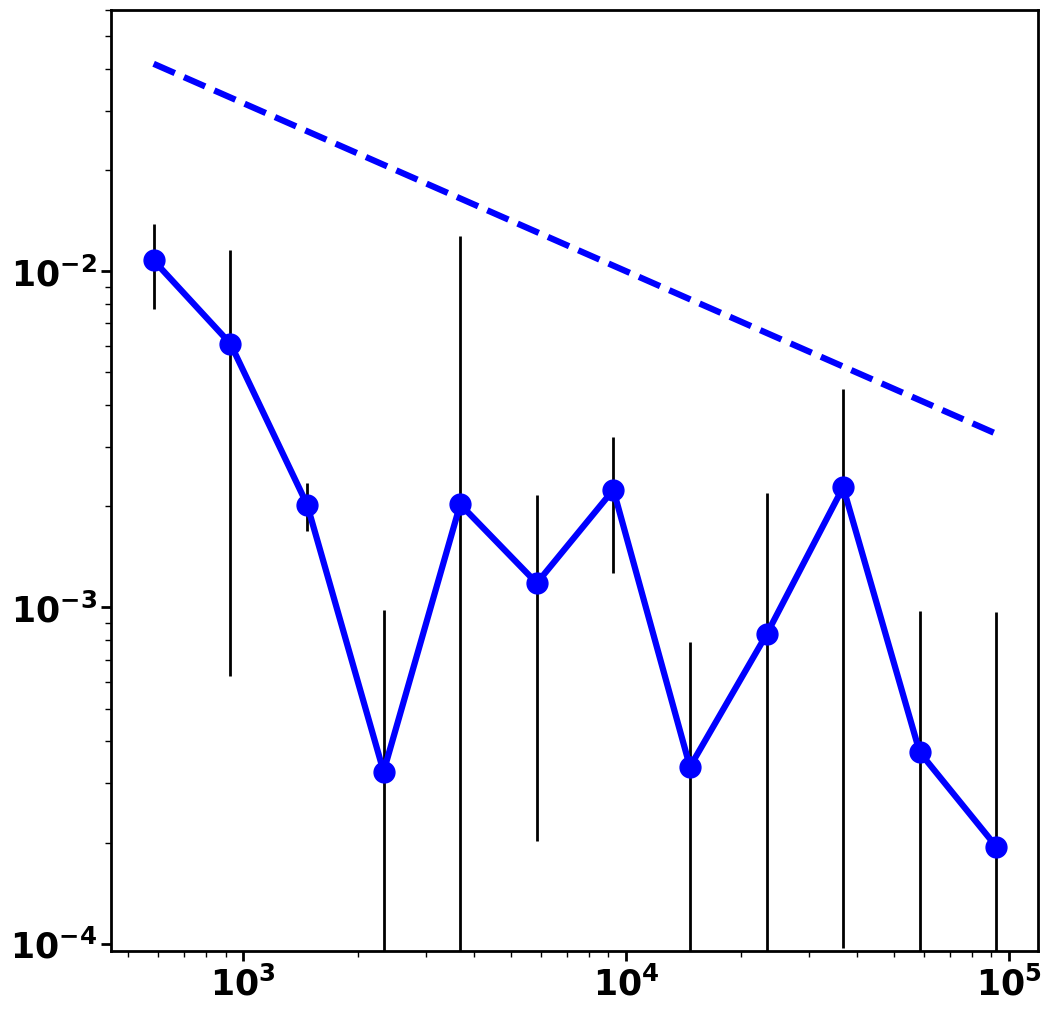

In [173]:
x = cauchy_nums_Vs.copy()
y = cauchy_coefficients_means.copy()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

eigenvalue_linewidth = 4.5
eigenvalue_markersize = 15

ax.errorbar(x, y, yerr=[cauchy_coefficients_vars, cauchy_coefficients_vars], fmt='o-', 
            c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize, elinewidth=2, ecolor='black')

ax.set_xscale('log')
ax.set_yscale('log')

ax.loglog(x, x**(-0.5) * 1, '--', c='b', linewidth=eigenvalue_linewidth)

style_plot(fig, ax, aspect=None)

ax.set_ylim(9.5e-5, 6e-2)

plt.savefig("../figures/rgg/coefficient_cauchy_convergence_plot.png", dpi=300, bbox_inches="tight")

plt.show()


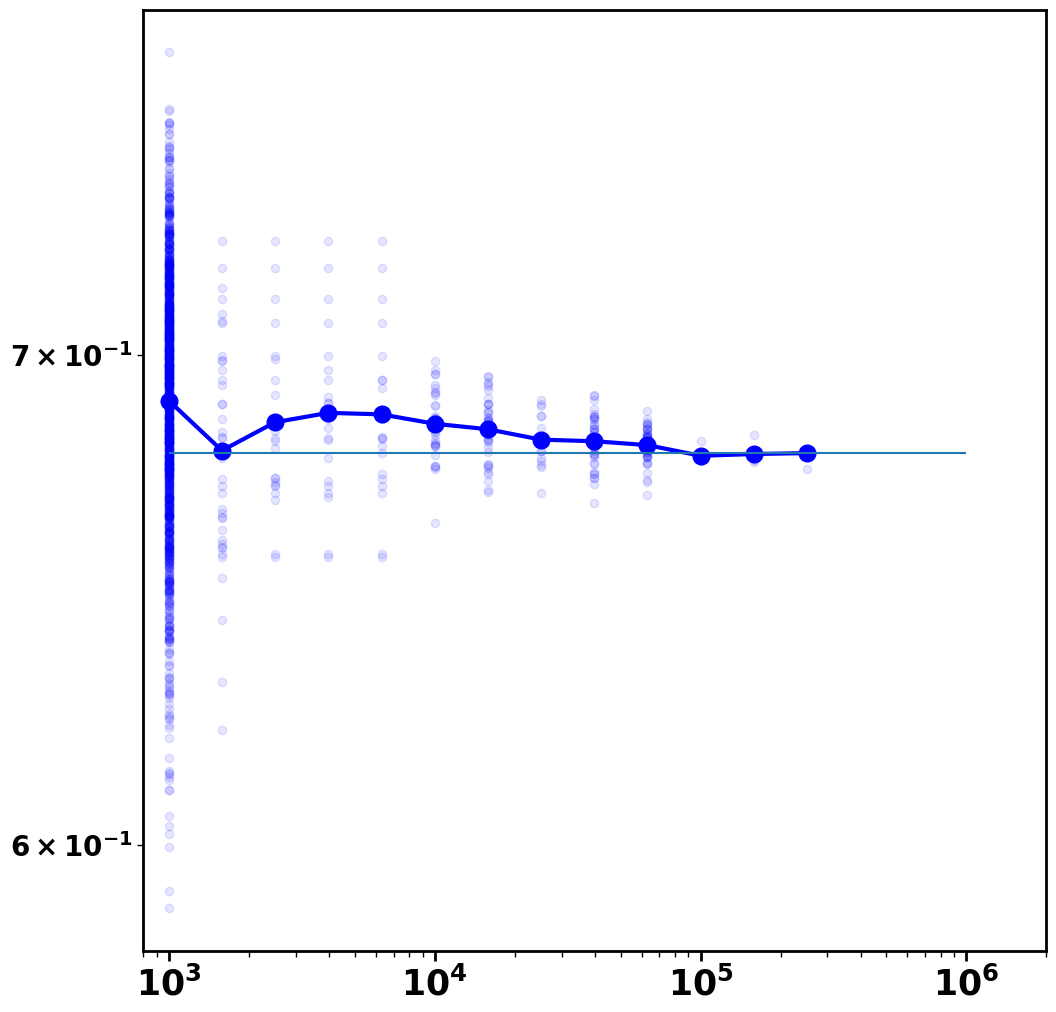

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

eigenvalue_linewidth = 3
eigenvalue_markersize = 12

ax.loglog(coefficients_nums_Vs, coefficients_means, 'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

for num_Vs in coefficients_nums_Vs:
    y = coefficients[num_Vs]
    x = np.ones(len(y)) * num_Vs
    ax.scatter(x, y, c='b', zorder=0, alpha=0.1)

ax.hlines(xmin=1e3, xmax=1e6, y=coefficients_means[-1])

ax.set_xlim([800, 2000000])

style_plot(fig, ax, aspect=None)

# ax.set_ylim([0.9, 0.925])

# plt.savefig("../figures/delaunay/eigenvalue_raw_plot.png", dpi=300, bbox_inches="tight")


In [47]:
coefficients.keys()

dict_keys([1000, 1584, 2511, 3981, 6309, 10000, 15848, 25118, 39810, 63095, 1000000])

In [ ]:
nums_Vs = (10**np.linspace(3, 6, 16)).astype(int)[:14]
print(f"num_Vs = {nums_Vs}")

next_data = {}

for en, num_Vs in enumerate(nums_Vs[1:5]):

    next_data[num_Vs] = {}

    en += 3

    print(f"\n\ngraph size = {en + 1} / {len(nums_Vs)}\n\n\n")

    seed = 0

    for seed in range(len(coefficients[num_Vs]) - 1, 40):

        np.random.seed(seed)
        rd = construct_graph.patch_graph.RGG(num_Vs)
        g = construct_graph.patch_graph.Patch(rd)
        print(f"\nSEED = {seed}, num_Vs = {g.num_Vs}\n")
        eq = construct_graph.patch_graph.Cell_Problem(g)
        xi = eq.solve_corrector_equation()

        next_data[num_Vs][seed] = eq.construct_homogenized_tensor(xi)



graph size = 4 / 11




SEED = 27, num_Vs = 1584


SEED = 28, num_Vs = 1584


SEED = 29, num_Vs = 1584


SEED = 30, num_Vs = 1584


SEED = 31, num_Vs = 1584


SEED = 32, num_Vs = 1584


SEED = 33, num_Vs = 1584


SEED = 34, num_Vs = 1584


SEED = 35, num_Vs = 1584


SEED = 36, num_Vs = 1584


SEED = 37, num_Vs = 1584


SEED = 38, num_Vs = 1584


SEED = 39, num_Vs = 1584



graph size = 5 / 11




SEED = 10, num_Vs = 2511


SEED = 11, num_Vs = 2511


SEED = 12, num_Vs = 2511


SEED = 13, num_Vs = 2511


SEED = 14, num_Vs = 2511


SEED = 15, num_Vs = 2511


SEED = 16, num_Vs = 2511


SEED = 17, num_Vs = 2511


SEED = 18, num_Vs = 2511


SEED = 19, num_Vs = 2511


SEED = 20, num_Vs = 2511


SEED = 21, num_Vs = 2511


SEED = 22, num_Vs = 2511


SEED = 23, num_Vs = 2511


SEED = 24, num_Vs = 2511


SEED = 25, num_Vs = 2511


SEED = 26, num_Vs = 2511


SEED = 27, num_Vs = 2511


SEED = 28, num_Vs = 2511


SEED = 29, num_Vs = 2511


SEED = 30, num_Vs = 2511


SEED = 31, num_Vs = 2511


SEED

In [30]:
nums_Vs = np.array(list(coefficients.keys()))[:]
print(nums_Vs)
coefficients_means = []
for num_Vs in coefficients:
    coefficients_means.append(np.mean(coefficients[num_Vs]))
coefficients_means = np.array(coefficients_means)[:]
print(coefficients_means)

[   1000    1584    2511    3981    6309   10000   15848   25118   39810
   63095 1000000]
[0.6899835  0.67449526 0.67992539 0.68383383 0.68214876 0.68497168
 0.68379039 0.68155196 0.68121621 0.68038494 0.67810716]


In [31]:
richardson_extrapolated_value = ((nums_Vs[-1]**(-1.) * coefficients_means[-2] - nums_Vs[-2]**(-1.) * coefficients_means[-1]) 
                                 / (nums_Vs[-1]**(-1.) - nums_Vs[-2]**(-1.)))

print(richardson_extrapolated_value)

0.6779537665877887


In [32]:
torus_continuum_eigenvalue = richardson_extrapolated_value * 4 * np.pi**2 / 2
print(torus_continuum_eigenvalue)

13.382270956899895


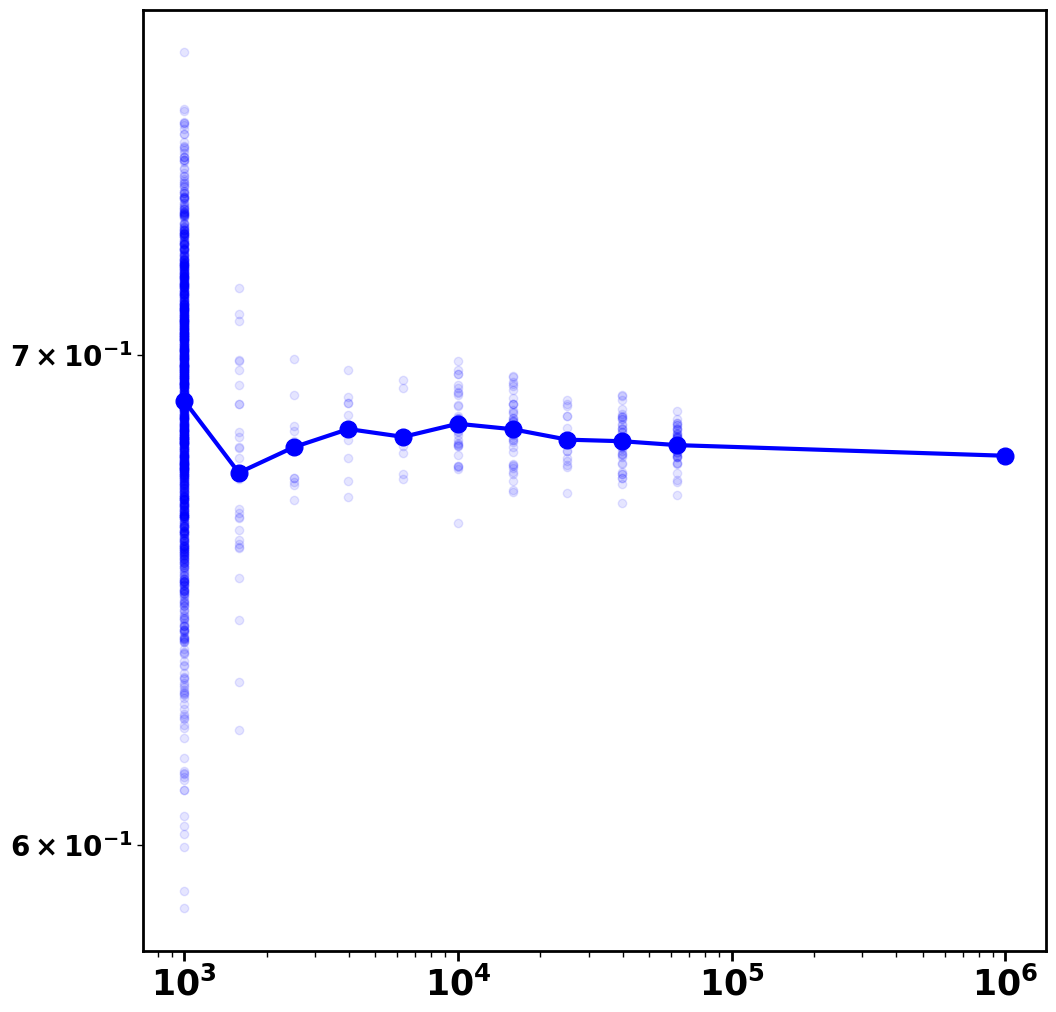

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

eigenvalue_linewidth = 3
eigenvalue_markersize = 12

ax.loglog(nums_Vs, coefficients_means, 'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

for num_Vs in nums_Vs:
    y = coefficients[num_Vs]
    x = np.ones(len(y)) * num_Vs
    ax.scatter(x, y, c='b', zorder=0, alpha=0.1)

# ax.set_xlim([800, 40000])

style_plot(fig, ax, aspect=None)

# ax.set_ylim([0.9, 0.925])

# plt.savefig("../figures/delaunay/eigenvalue_raw_plot.png", dpi=300, bbox_inches="tight")


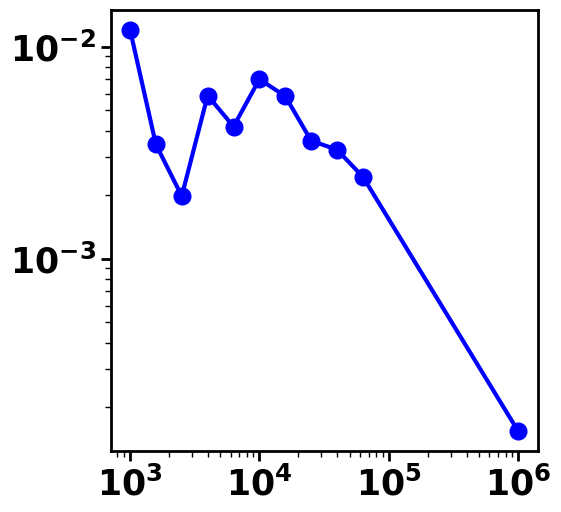

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

eigenvalue_linewidth = 3
eigenvalue_markersize = 12

ax.loglog(nums_Vs, np.abs(coefficients_means - richardson_extrapolated_value), 'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

# ax.set_xlim([800, 40000])

style_plot(fig, ax, aspect=None)

# ax.set_ylim([0.9, 0.925])

# plt.savefig("../figures/delaunay/eigenvalue_raw_plot.png", dpi=300, bbox_inches="tight")

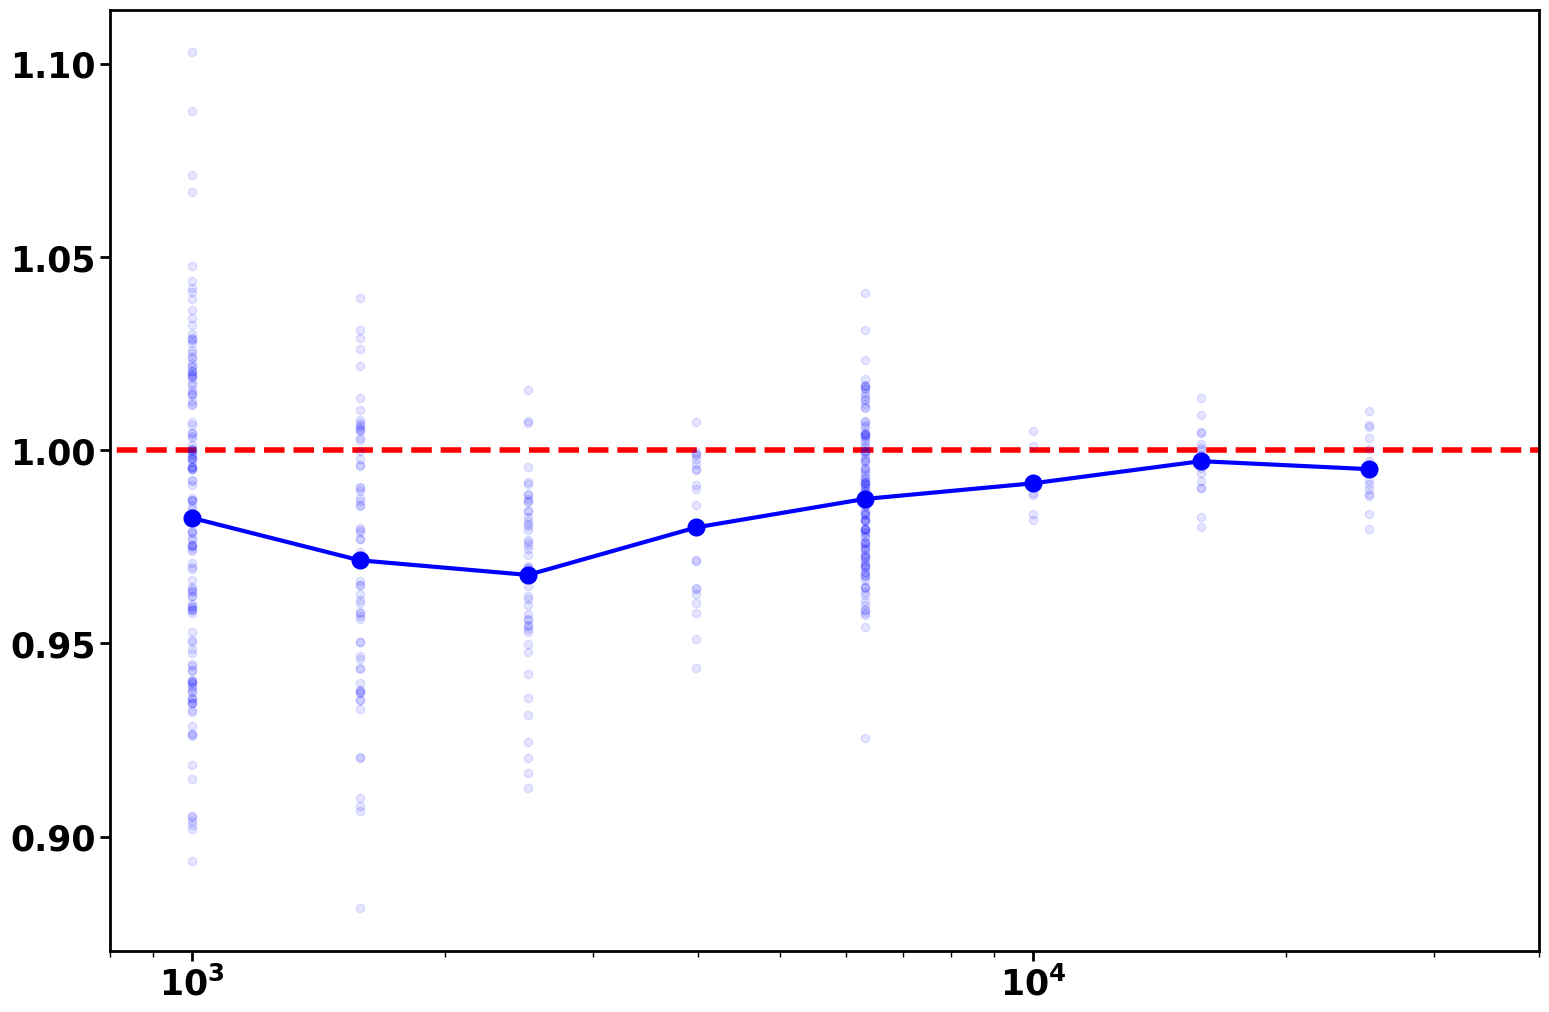

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

eigenvalue_linewidth = 3
eigenvalue_markersize = 12
ax.plot(torus_nums_Vs, torus_means**2 / torus_continuum_eigenvalue, 'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)
ax.set_xscale('log')
# ax.loglog(coefficients_nums_Vs, coefficients_means, '-', c='r', linewidth=5, markersize=12, alpha=0.5, zorder=0)
ax.hlines(y=1., xmin=50, xmax=1500000, color='r', linestyle='--', linewidth=4, zorder=0)

for num_Vs in torus_nums_Vs:
    y = np.mean(list(torus_eigenvalues[num_Vs].values()), axis=1)**2 / torus_continuum_eigenvalue
    x = np.ones(len(y)) * num_Vs
    ax.scatter(x, y, c='b', zorder=0, alpha=0.1)

ax.set_xlim([800, 40000])

style_plot(fig, ax, aspect=None)

# ax.set_ylim([0.9, 0.925])

# plt.savefig("../figures/delaunay/eigenvalue_raw_plot.png", dpi=300, bbox_inches="tight")


## 1e6 vertices

In [130]:
num_Vs = 100_000
big_eigs = []

for seed in range(5):
    print(f"\nSEED = {seed}, num_Vs = {num_Vs}\n")

    print("Constructing graph")
    np.random.seed(seed)
    rd = construct_graph.patch_graph.RGG(num_Vs)
    g = construct_graph.patch_graph.Patch(rd)
    print("DONE Constructing graph")

    print()

    print("Calculating eigenvalues")
    guesses = np.linspace(3.5, 3.8, 10)
    eigs = solve_laplace_operator.solve_laplace_operator.Eigenvalue_Calculator(g)
    big_eigs.append(sequential_Newton(guesses, eigs))
    print(big_eigs)
    print("DONE calculating eigenvalues")

seed = 0
num_Vs = 1_000_000
print(f"\nSEED = {seed}, num_Vs = {num_Vs}\n")

print("Constructing graph")
np.random.seed(seed)
rd = construct_graph.patch_graph.RGG(num_Vs)
g = construct_graph.patch_graph.Patch(rd)
print("DONE Constructing graph")

print()

print("Solving cell problem")
eq = construct_graph.patch_graph.Cell_Problem(g)
xi = eq.solve_corrector_equation()
coefficient_1M = eq.construct_homogenized_tensor(xi)
print(coefficient_1M)
print("DONE solving cell problem")


SEED = 0, num_Vs = 100000

Constructing graph
DONE Constructing graph

Calculating eigenvalues

Calculating eig number 0

----------------------
Converged at step 2:

k = 3.5872754208336515
----------------------

Calculating eig number 1

----------------------
Converged at step 2:

k = 3.6422355299273774
----------------------

Calculating eig number 2

----------------------
Converged at step 2:

k = 3.6619912045241456
----------------------

Calculating eig number 3

----------------------
Converged at step 2:

k = 3.7239574564597917
----------------------
[array([3.58727542, 3.64223553, 3.6619912 , 3.72395746])]
DONE calculating eigenvalues

SEED = 1, num_Vs = 100000

Constructing graph
DONE Constructing graph

Calculating eigenvalues

Calculating eig number 0

----------------------
Converged at step 2:

k = 3.6047350079482756
----------------------

Calculating eig number 1

----------------------
Converged at step 2:

k = 3.6414150403984826
----------------------

Calculating 

In [134]:
np.mean(coefficients[63095])

0.6803849409936746

In [ ]:
0.6781071615369281

In [145]:
coefficient_1M

0.6781071615369281

In [150]:
coefficients_difs = [np.abs(coefficients_means[i+1] - coefficients_means[i]) for i in range(len(coefficients_means) - 1)]
coefficients_nums_Vs_difs = [np.abs(coefficients_nums_Vs[i+1] - coefficients_nums_Vs[i]) for i in range(len(coefficients_nums_Vs) - 1)]

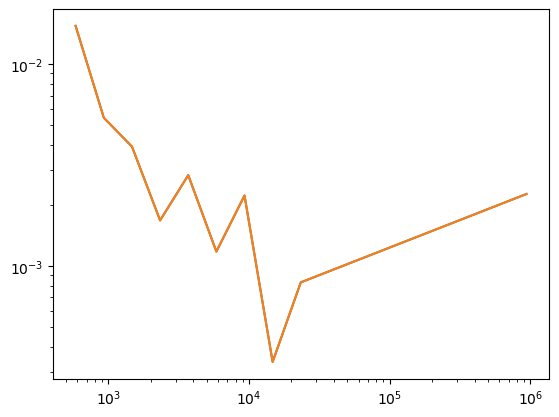

In [151]:
plt.loglog(coefficients_nums_Vs_difs, coefficients_difs)
plt.loglog(coefficients_nums_Vs_difs, coefficients_difs)